# Executando a tabela

In [1]:
!pip install CatBoost

In [1]:
import pandas as pd
import numpy as np
import nltk 
import re
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from wordcloud import WordCloud
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [ ]:
!pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
!pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
df = pd.read_csv("C:\\Users\\Rodrigo.INTELI\\Downloads\\INTELI\\PROJETO-6\\Projeto2\\src\\df_final.csv")

# Tratamento
- Objetivo: Revisar o Tratamento e Pré Processamento

In [35]:
#Removendo espaço extras
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=str(text))
    return without_sc

df['texto_lema'] = df['texto_lema'].apply(lambda x: remove_extra_white_spaces(x))

#Como os tokens lematizados quando baixados em csv, vieram com aspas, espaços a mais, stop words e algumas palavras em maíusculo, irei tokenizar as frases já lematizadas
def tokens(row):
    return str(row).lower().split()

df['tokens_new'] = df['texto_lema'].apply(tokens)

df.head()

,autor,texto,sentimento,tokens_lema,vetores,soma_vetores,texto_lema,tokens_new
0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...",[ 24.175386 -32.35245 -19.241129 -8.27...,-20.574974,confira resultado de nosso fundo mes fevereiro...,"[confira, resultado, de, nosso, fundo, mes, fe..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...",[ 1.36964726e+00 -1.70724316e+01 -9.89577770e+...,-44.773376,Alvarez Marsal estara conosco sportainmet simb...,"[alvarez, marsal, estara, conosco, sportainmet..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...",[ 12.244981 -20.071892 -7.7097063 -5.48...,3.235275,repost btg With makerepost entenda impacto de ...,"[repost, btg, with, makerepost, entenda, impac..."
3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']",[ 0.05900092 0.20170294 -0.35151416 -0.012351...,-0.193069,minuto touro ouro,"[minuto, touro, ouro]"
4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']",[ 0.609844 -0.01448398 -0.49792445 -0.503695...,-0.936380,Ricktolledo sim,"[ricktolledo, sim]"


In [ ]:
#Verificando se tem valores nulos
df.isna().sum()

autor           0
texto           0
sentimento      0
tokens_lema     0
vetores         0
soma_vetores    0
texto_lema      0
tokens_new      0
dtype: int64

In [ ]:
# identificar as linhas que contêm valores nulos
linhas_com_null = df.isnull().any(axis=1)

# imprimir as linhas que contêm valores nulos
print(df[linhas_com_null])

Empty DataFrame
Columns: [autor, texto, sentimento, tokens_lema, vetores, soma_vetores, texto_lema, tokens_new]
Index: []


In [36]:
#Salvando o df sem valores nulos
df = df.dropna()

In [ ]:
#Tamanho do dataset
len(df)

12193

In [37]:
# remover duplicadas que contém linhas que têm conteúdo igual com autor e texto
df = df.drop_duplicates(subset=['autor', 'texto_lema'], keep='first')
len(df)

11636

## Frêquencia de Palavras e Eliminação de Stop_Words
- Objetivo: Verificar se tem a necesseidade de aprimorar o pré-processamento e eliminar stop-words presentes

In [ ]:
#Aplicando frequência usando NLTK
tokens_new = []
for sentence in df['tokens_new'].tolist():
    for tokens in sentence:
        tokens_new.append(tokens)
freq_dist = nltk.FreqDist(tokens_new)

freq_dist.most_common(100)

[('de', 12384),
 ('btg', 8761),
 ('ser', 3857),
 ('um', 3203),
 ('ter', 3070),
 ('nao', 3045),
 ('investimento', 2958),
 ('voce', 2921),
 ('mais', 2785),
 ('esse', 2725),
 ('este', 2500),
 ('nosso', 2390),
 ('maosaplaudir', 2333),
 ('o', 2288),
 ('por', 2185),
 ('meu', 1973),
 ('bom', 1858),
 ('se', 1849),
 ('muito', 1820),
 ('dia', 1769),
 ('todo', 1718),
 ('banco', 1701),
 ('fazer', 1651),
 ('grande', 1505),
 ('estar', 1449),
 ('em', 1354),
 ('poder', 1288),
 ('mercado', 1267),
 ('evento', 1243),
 ('financeiro', 1172),
 ('pactual', 1140),
 ('ano', 1097),
 ('ou', 1086),
 ('ja', 1054),
 ('eu', 1049),
 ('fundo', 1007),
 ('link', 969),
 ('cliente', 951),
 ('sao', 951),
 ('ir', 926),
 ('foguete', 918),
 ('so', 902),
 ('hoje', 854),
 ('mas', 849),
 ('brasil', 842),
 ('saber', 778),
 ('querer', 765),
 ('investir', 749),
 ('tambem', 742),
 ('novo', 723),
 ('conta', 708),
 ('empresa', 678),
 ('2022', 666),
 ('valor', 659),
 ('ainda', 652),
 ('dinheiro', 649),
 ('bio', 644),
 ('time', 624),
 (

In [38]:
#Função para retirada de Stop Words
def stop(row):
    stop_words = ['eu', 'tu', 'ele', 'ela', 'nós', 'nos', 'vós', 'vos', 'eles', 'elas', 'um', 'em', 'de'
                  'isso', 'isto', 'aquilo', 'algum', 'alguma', 'alguns', 'algumas',
                  'outro', 'outra', 'outros', 'outras', 'tão', 'tal', 'tanto', 'tanta', 'tantos', 'tantas', 
                  'seu', 'sua', 'seus', 'suas', 'dele', 'dela', 'deles', 'delas', 
                  'quem', 'qual', 'quais', 'que', 'onde', 'como', 'e','um', 'as', 'no',
                  'para', 'por', 'com', 'sem', 'sob', 'sobre', 'de', 'da', 'desde', 'em', 'entre', 'porque',
                  'á', 'a', 'o', 'ola', 'olá', 'pra', 'para', 'bemvindo', 'benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'na', 'no', 'esse', 'este', 'voce', 'nosso', 'ou', 'btg','ser', 'mais', 'ter', 'meu', 'se', 'esta', 'todo', 'estar']
    new = []
    for word in row:
        if word not in stop_words:
            new.append(word)
    return new

df['tokens_new'] = df['tokens_new'].apply(stop)

df.head()


,autor,texto,sentimento,tokens_lema,vetores,soma_vetores,texto_lema,tokens_new
0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...",[ 24.175386 -32.35245 -19.241129 -8.27...,-20.574974,confira resultado de nosso fundo mes fevereiro...,"[confira, resultado, fundo, mes, fevereiro22, ..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...",[ 1.36964726e+00 -1.70724316e+01 -9.89577770e+...,-44.773376,Alvarez Marsal estara conosco sportainmet simb...,"[alvarez, marsal, estara, conosco, sportainmet..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...",[ 12.244981 -20.071892 -7.7097063 -5.48...,3.235275,repost btg With makerepost entenda impacto de ...,"[repost, with, makerepost, entenda, impacto, c..."
3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']",[ 0.05900092 0.20170294 -0.35151416 -0.012351...,-0.193069,minuto touro ouro,"[minuto, touro, ouro]"
4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']",[ 0.609844 -0.01448398 -0.49792445 -0.503695...,-0.936380,Ricktolledo sim,"[ricktolledo, sim]"


In [ ]:
#Aplicando Novamente A frequência para verificar se foram retiradas
tokens_new = []
for sentence in df['tokens_new'].tolist():
    for tokens in sentence:
        tokens_new.append(tokens)
freq_dist = nltk.FreqDist(tokens_new)

freq_dist.most_common(100)

[('nao', 3045),
 ('investimento', 2958),
 ('maosaplaudir', 2333),
 ('bom', 1858),
 ('muito', 1820),
 ('dia', 1769),
 ('banco', 1701),
 ('fazer', 1651),
 ('grande', 1505),
 ('poder', 1288),
 ('mercado', 1267),
 ('evento', 1243),
 ('financeiro', 1172),
 ('pactual', 1140),
 ('ano', 1097),
 ('ja', 1054),
 ('fundo', 1007),
 ('link', 969),
 ('cliente', 951),
 ('sao', 951),
 ('ir', 926),
 ('foguete', 918),
 ('so', 902),
 ('hoje', 854),
 ('mas', 849),
 ('brasil', 842),
 ('saber', 778),
 ('querer', 765),
 ('investir', 749),
 ('tambem', 742),
 ('novo', 723),
 ('conta', 708),
 ('empresa', 678),
 ('2022', 666),
 ('valor', 659),
 ('ainda', 652),
 ('dinheiro', 649),
 ('bio', 644),
 ('time', 624),
 ('mesmo', 619),
 ('sempre', 618),
 ('semana', 608),
 ('tudo', 588),
 ('ficar', 586),
 ('agora', 573),
 ('pessoa', 569),
 ('ate', 561),
 ('contar', 549),
 ('falar', 542),
 ('vida', 539),
 ('primeiro', 537),
 ('cartao', 524),
 ('mercadofinanceiro', 523),
 ('rostochorandoderir', 520),
 ('parte', 507),
 ('taxa

# Visualização de dados
- Objetivo, fazer uma análise mais refinada dos dados.

## Proporção das Labels
- Percebe-se que a quantidade de valores negativos é muito inferior.
- Escolha do gráfico de pizza foi para facilitar a visualização, tal como o uso da biblioteca plotly, que permite maior interação com o gráfico.

In [ ]:
#Gráfico de pizza 
proporcao = df['sentimento'].value_counts(normalize=True)
fig = px.pie(proporcao, names=proporcao.index, values=proporcao.values)
fig.update_layout(
    title='Proporção dos Sentimentos'
)
fig.show()

## Relação entre número de tokens e sentimento
- Percebe-se que pela distribuição, a proporção de ser neutro, tem o maior pico
- Escolha do gráfico KDE, foi devido sua forma de mostrar a densidade dos dados, retornando a probabilidade de uma amostragem, dado sua população.
-Cálculo KDE:
KDE(x) = (1 / (n * h)) * Σ K((x - xi) / h)

onde:

KDE(x) é o valor estimado da densidade de probabilidade para um determinado ponto x.
n é o número total de pontos de dados no conjunto de dados.
h é o parâmetro de suavização ou largura de banda (bandwidth).
Σ representa a soma ao longo de todos os pontos de dados.
K é a função kernel, que é uma função simétrica em torno de zero que define a forma da contribuição de cada ponto de dados para a estimativa de densidade. Exemplos comuns de funções kernel incluem a função gaussiana (normal) e a função de Epanechnikov.

In [39]:
#Criando coluna com o número de tokens
df['tamanho'] = df['tokens_new'].apply(lambda x: len(x))
df['tamanho']

0         82
1         43
2         43
3          3
4          2
        ... 
12188     25
12189     72
12190     13
12191    101
12192     15
Name: tamanho, Length: 11636, dtype: int64

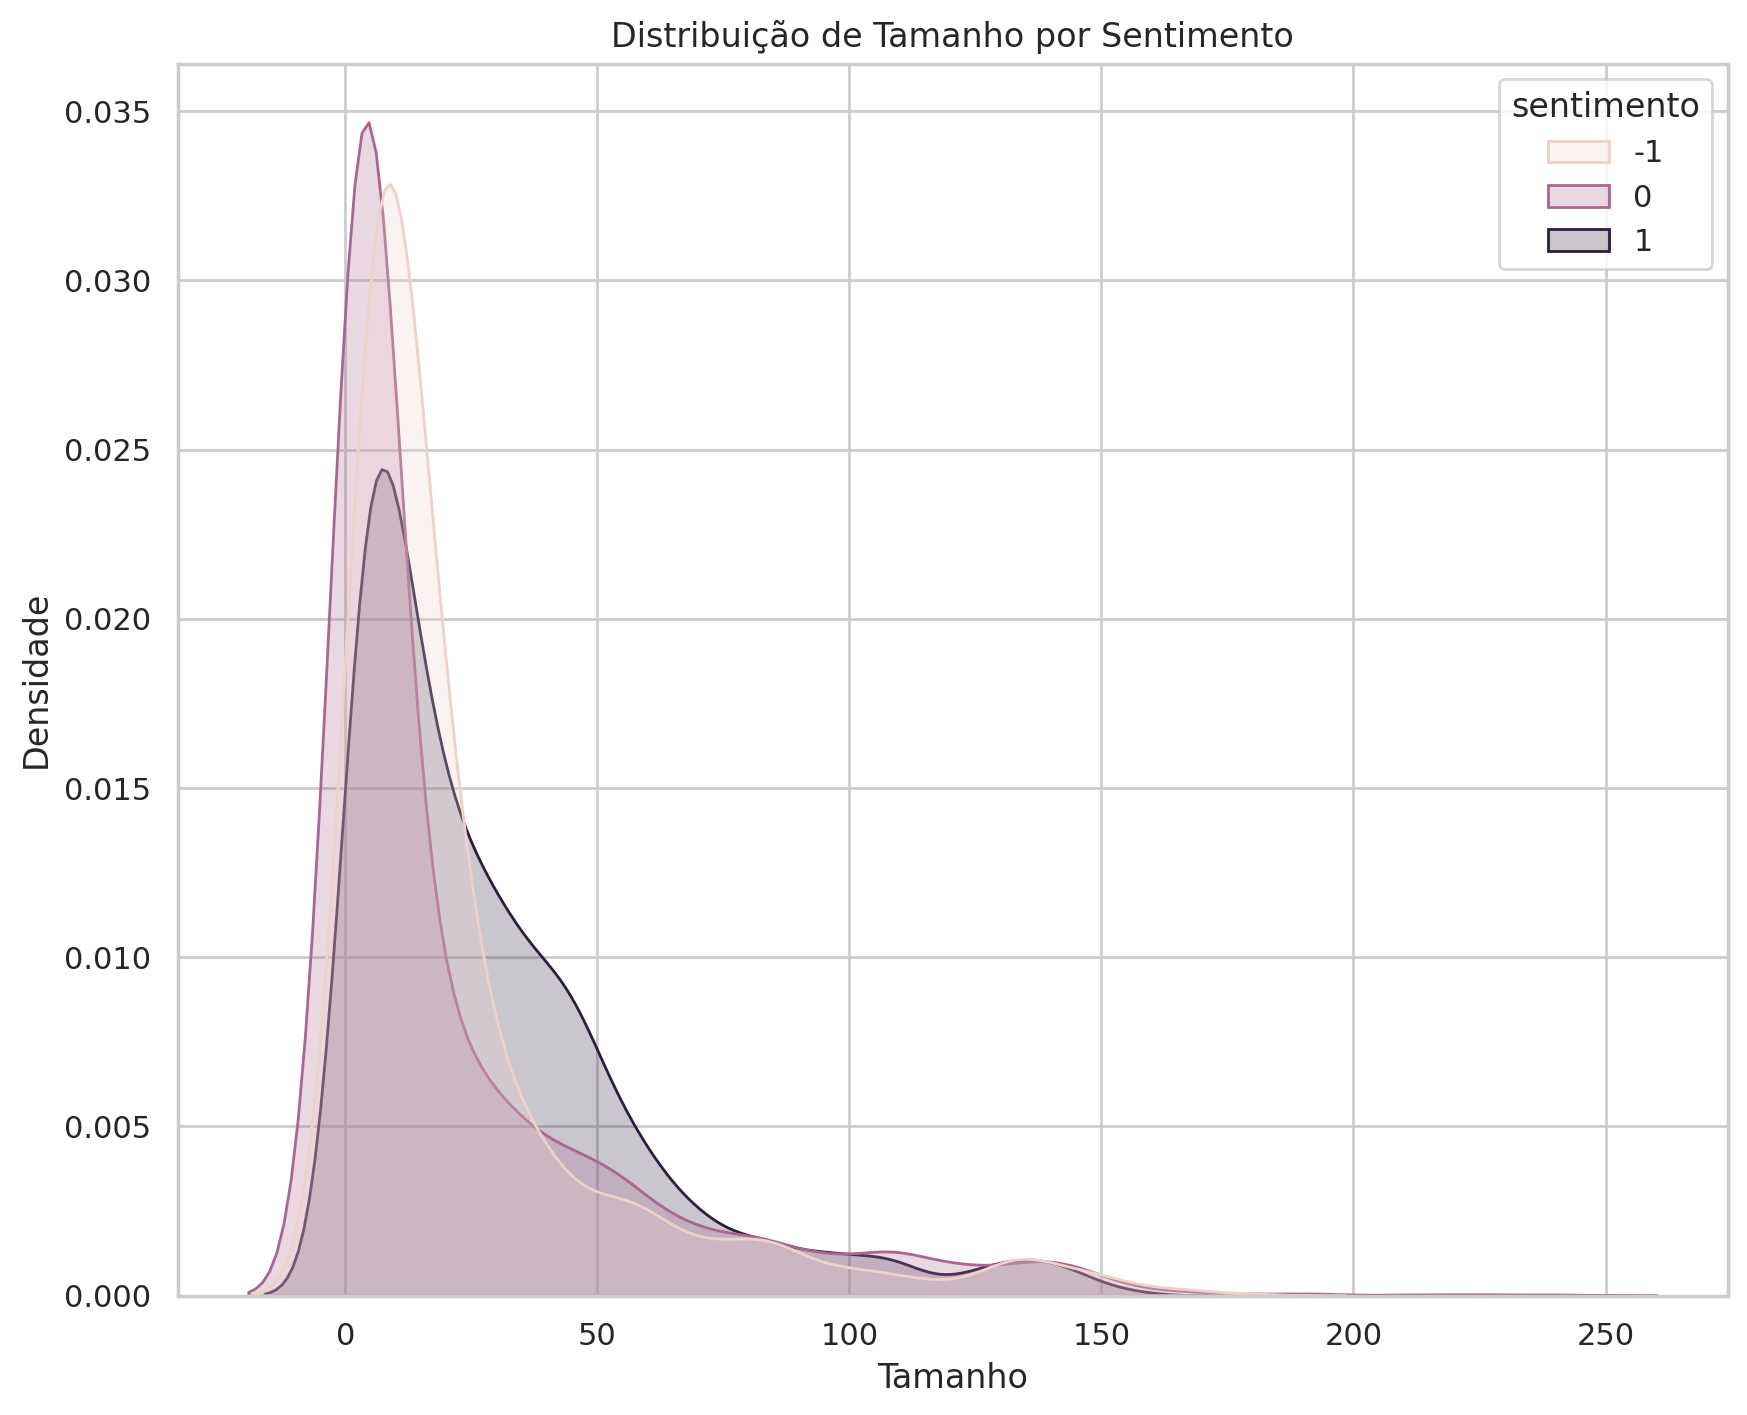

In [ ]:
sns.set(style="whitegrid", palette=["blue", "red", "green"])

fig, ax = plt.subplots(figsize=(10, 8), dpi=200
                      )

sns.kdeplot(data=df, x='tamanho', hue='sentimento', ax=ax, fill=True, common_norm=False)

ax.set_title('Distribuição de Tamanho por Sentimento')
ax.set_xlabel('Tamanho')
ax.set_ylabel('Densidade')

plt.show()

## Word Cloud entre as palavras mais positivas

In [ ]:
positivo = df[df['sentimento'] == 1]

In [ ]:
word_positive = []
for sentences in positivo['tokens_new']:
    for tokens in sentences:
        word_positive.append(tokens)
texto = ' '.join(word_positive)

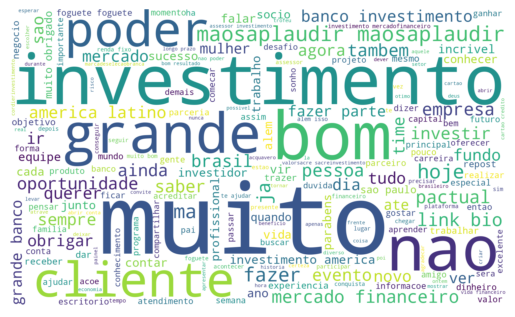

In [ ]:
# WordCloud
# Criando um objeto WordCloud com as configurações desejadas
wordcloud = WordCloud(width=2000, height=1200,background_color='white').generate(texto)

# Mostrando a imagem da nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Cloud entre as palavras com maior aparição nos negativos

In [ ]:
negativo = df[df['sentimento'] == -1]

In [ ]:
word_negative = []
for sentences in negativo['tokens_new']:
    for tokens in sentences:
        word_negative.append(tokens)
texto = ' '.join(word_negative)

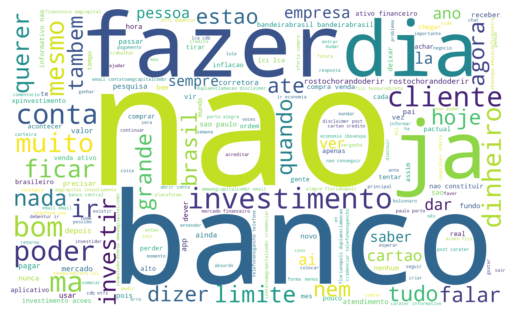

In [ ]:
# WordCloud
# Criando um objeto WordCloud com as configurações desejadas
wordcloud = WordCloud(width=2000, height=1200,background_color='white').generate(texto)

# Mostrando a imagem da nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
#Atualizando o texto_lema com a reprocessamento
def juntar(row):
    juntar = []
    for word in row:
        juntar.append(word)
    return ' '.join(juntar)

df['texto_lema'] = df['tokens_new'].apply(juntar)
df.head()

,autor,texto,sentimento,tokens_lema,vetores,soma_vetores,texto_lema,tokens_new,tamanho
0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...",[ 24.175386 -32.35245 -19.241129 -8.27...,-20.574974,confira resultado fundo mes fevereiro22 inform...,"[confira, resultado, fundo, mes, fevereiro22, ...",82
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...",[ 1.36964726e+00 -1.70724316e+01 -9.89577770e+...,-44.773376,alvarez marsal estara conosco sportainmet simb...,"[alvarez, marsal, estara, conosco, sportainmet...",43
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...",[ 12.244981 -20.071892 -7.7097063 -5.48...,3.235275,repost with makerepost entenda impacto conflit...,"[repost, with, makerepost, entenda, impacto, c...",43
3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']",[ 0.05900092 0.20170294 -0.35151416 -0.012351...,-0.193069,minuto touro ouro,"[minuto, touro, ouro]",3
4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']",[ 0.609844 -0.01448398 -0.49792445 -0.503695...,-0.936380,ricktolledo sim,"[ricktolledo, sim]",2


In [16]:
df.query("autor == 'amgcapitalinvest'")

,autor,texto,sentimento,tokens_lema,vetores,soma_vetores,texto_lema,tokens_new
1128,amgcapitalinvest,(link na bio) Enriquecer é uma questão de esco...,1,"['link', 'bio', 'enriquecer', 'um', 'questao',...",[ 6.60367203e+01 -2.53362293e+01 -7.12619781e+...,-242.829483,link bio enriquecer questao escolha normalment...,"[link, bio, enriquecer, questao, escolha, norm..."
1187,amgcapitalinvest,"Hoje, a capital dos gaúchos completa 250 anos!...",1,"['hoje', 'capital', 'de o', 'gaucho', 'complet...",[ 21.072918 -17.014624 -33.57798 -1...,-189.809311,hoje capital gaucho completo 250 ano parabens ...,"[hoje, capital, gaucho, completo, 250, ano, pa..."
1193,amgcapitalinvest,Evento Voz Feminina no btgpactual ❣️,0,"['evento', 'voz', 'feminino', 'btg', 'exclamac...",[-0.38895392 -2.3917308 -0.83299035 -0.786687...,1.510356,evento voz feminino exclamacaodecoracao,"[evento, voz, feminino, exclamacaodecoracao]"
1200,amgcapitalinvest,🖥 www.amgcapital.com.br 📧 E-mail: contato@amgc...,0,"['computadordemesa', 'wwwamgcapitalcombr', 'em...",[ 22.040134 -20.792818 -38.179314 -16.70...,-252.446243,computadordemesa wwwamgcapitalcombr email emai...,"[computadordemesa, wwwamgcapitalcombr, email, ..."
1284,amgcapitalinvest,A AMG Capital e o BTG Pactual se juntaram a um...,1,"['amg', 'capital', 'btg', 'pactual', 'se', 'ju...",[ 3.94020615e+01 -1.19659519e+01 -5.01728592e+...,-179.366486,amg capital pactual juntar conhecer respeitar ...,"[amg, capital, pactual, juntar, conhecer, resp..."
...,...,...,...,...,...,...,...,...
11899,amgcapitalinvest,"Quando o assunto é viagem internacional, uma d...",1,"['quando', 'assunto', 'viagem', 'internacional...",[ 110.24188 -44.637 -76.14397 -71.7...,-198.830322,quando assunto viagem internacional coisa gera...,"[quando, assunto, viagem, internacional, coisa..."
11952,amgcapitalinvest,Você pretende aproveitar a Black Friday este a...,0,"['voce', 'pretender', 'aproveitar', 'Black', '...",[ 3.71430092e+01 -2.49629650e+01 -4.76321068e+...,-263.979706,pretender aproveitar black friday ano seguranc...,"[pretender, aproveitar, black, friday, ano, se..."
11997,amgcapitalinvest,(link na bio) Resenha do livro “Investimentos:...,1,"['link', 'bio', 'Resenha', 'de o', 'livro', 'i...",[ 5.51743011e+01 -5.15838165e+01 -6.10602531e+...,-257.005707,link bio resenha livro investimento livro segr...,"[link, bio, resenha, livro, investimento, livr..."
12144,amgcapitalinvest,"Quer diversificar sua carteira, mas não conhec...",1,"['querer', 'diversificar', 'carteira', 'mas', ...",[ 43.803192 -32.121407 -55.753254 -3...,-251.730148,querer diversificar carteira mas nao conhecer ...,"[querer, diversificar, carteira, mas, nao, con..."


#Usando o Bert 

In [2]:
!pip install --user transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from transformers import AutoTokenizer  # Or BertTokenizer 
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  #Permite baixar qualquer modelo do Huggin Face

model = AutoModelForPreTraining.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False,  output_hidden_states=True)


## Testando Tokenização do Bert

In [ ]:
#Um sentença
tokenizer('oi, eu gosto de andar')

{'input_ids': [101, 146, 22283, 117, 2779, 10303, 125, 8054, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
#Várias sentenças 
tokenizer(['oi, gosto de andar', 'nao gosto de andar na rua'])
#Percebe-se que o número de vetores não é o mesmo para as frases, para evitar isso adicione paddings

{'input_ids': [[101, 146, 22283, 117, 10303, 125, 8054, 102], [101, 229, 22280, 10303, 125, 8054, 229, 4768, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
tokenizer(['oi, gosto de andar', 'nao gosto de andar na rua'], padding = True)
#Percebe-se que ele adiciona zeros para equalizar o número de vetores

{'input_ids': [[101, 146, 22283, 117, 10303, 125, 8054, 102, 0], [101, 229, 22280, 10303, 125, 8054, 229, 4768, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
#Para limitar o número de caracteres máximo em uma sentença utilize o parâmetro truncation (512 palavras)
#Para transformar umas lista python para um tensor do tensorflow, utilize o parâmetro return_tensors
tokenizer(['oi, gosto de andar', 'nao gosto de andar na rua'], padding = True, truncation = True, return_tensors = 'tf')


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[  101,   146, 22283,   117, 10303,   125,  8054,   102,     0],
       [  101,   229, 22280, 10303,   125,  8054,   229,  4768,   102]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

##Tokenizando o texto com Bert

In [20]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

In [19]:
import torch
from transformers import BertTokenizer, BertModel

# define the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

# define the maximum segment length
max_segment_len = 256

# define a function to embed a text segment
def embed_text_segment(text):
    # tokenize the text segment
    tokenized_text = tokenizer.encode(text, add_special_tokens=True, max_length=max_segment_len, truncation=True)
    # convert the tokenized text to a tensor
    input_ids = torch.tensor([tokenized_text])
    # generate the embeddings for the text segment
    with torch.no_grad():
        embeddings = model(input_ids)[0][0]
    return embeddings.numpy()

# apply the embed_text_segment function to each text segment
def embed_text(text):
    # check for empty text
    if len(text) == 0:
        return None
    # split the text into segments of maximum length
    segments = [text[i:i+max_segment_len] for i in range(0, len(text), max_segment_len)]
    # embed each text segment and concatenate the embeddings
    embeddings = [embed_text_segment(segment) for segment in segments]
    embeddings = np.concatenate(embeddings, axis=0)
    return embeddings

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
# apply the embed_text function to the 'texto_lema' column and store the embeddings in a new column 'embeddings'
import torch
df['embeddings'] = df['texto_lema'].apply(embed_text)

KeyboardInterrupt: ignored

#Separação de treino e teste

In [6]:
def juntar(row):
    juntar = []
    for word in row:
        juntar.append(word)
    return ' '.join(juntar)

df['texto_new'] = df['tokens_new'].apply(juntar)
df.head()

,autor,texto,sentimento,tokens_lema,vetores,soma_vetores,texto_lema,tokens_new,texto_new
0,v8_capital,Confira os resultados dos nossos fundos no mês...,0,"['confira', 'o', 'resultado', 'de o', 'nosso',...",[ 24.175386 -32.35245 -19.241129 -8.27...,-20.574974,confira resultado fundo mes fevereiro22 inform...,"[confira, resultado, fundo, mes, fevereiro22, ...",confira resultado fundo mes fevereiro22 inform...
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp...",[ 1.36964726e+00 -1.70724316e+01 -9.89577770e+...,-44.773376,alvarez marsal estara conosco sportainmet simb...,"[alvarez, marsal, estara, conosco, sportainmet...",alvarez marsal estara conosco sportainmet simb...
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,"['repost', 'btg', 'With', 'makerepost', 'enten...",[ 12.244981 -20.071892 -7.7097063 -5.48...,3.235275,repost with makerepost entenda impacto conflit...,"[repost, with, makerepost, entenda, impacto, c...",repost with makerepost entenda impacto conflit...
3,lmviapiana,Minuto touro de ouro,1,"['minuto', 'touro', 'ouro']",[ 0.05900092 0.20170294 -0.35151416 -0.012351...,-0.193069,minuto touro ouro,"[minuto, touro, ouro]",minuto touro ouro
4,vanilson_dos,@ricktolledo Sim,0,"['Ricktolledo', 'sim']",[ 0.609844 -0.01448398 -0.49792445 -0.503695...,-0.936380,ricktolledo sim,"[ricktolledo, sim]",ricktolledo sim


In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
X_train = vectorizer.fit_transform(df_train['texto_new'])
X_test = vectorizer.transform(df_test['texto_new'])

In [ ]:
Y_train = df_train['sentimento']
Y_test = df_test['sentimento']

In [ ]:

from imblearn.over_sampling import SMOTE

# Definir a estratégia de sobreamostragem para a classe minoritária
sampling_strategy = 'minority'

# Criar objeto SMOTE com a estratégia de sobreamostragem
smote = SMOTE(sampling_strategy=sampling_strategy)

# Aplicar oversampling aos dados de treinamento
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
from catboost import CatBoostClassifier


modelCB = CatBoostClassifier(task_type='CPU', iterations= 100, random_state=2022, eval_metric='Accuracy', verbose=5, learning_rate=0.05)

modelCB.fit(X_train_smote, y_train_smote, plot=True, eval_set=(X_test, Y_test))

In [ ]:
modelCB.fit(X_train_ros, y_train_ros, plot = True, eval_set = (X_train_ros, y_train_ros))

In [ ]:
class_order = modelCB.classes_
class_order

In [ ]:
from sklearn.metrics import recall_score
# Predição no conjunto de teste
y_pred = modelCB.predict(X_test)

# Cálculo da métrica Recall no conjunto de teste
recall = recall_score(Y_test, y_pred, average='macro')
recall

### Sem hiperparâmetros

In [52]:
!pip install xgboost

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score


# define the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# vectorize the text data and convert to a list
X = tfidf.fit_transform(df['texto_lema'])

In [42]:
tfidf.vocabulary_

{'confira': 7236,
 'resultado': 23543,
 'fundo': 12524,
 'mes': 18215,
 'fevereiro22': 11758,
 'informacoes': 14802,
 'documentacoes': 9471,
 'material': 17830,
 'tecnico': 26134,
 'poder': 21314,
 'acessar': 1749,
 'link': 16783,
 'abaixo': 1576,
 'v8': 27441,
 'cash': 6002,
 'fi': 11780,
 'renda': 23319,
 'fixo': 12021,
 'cp': 7850,
 'httpslnkdindusc2jmn': 14036,
 'vanquish': 27564,
 'termo': 26298,
 'httpslnkdind3pngjuu': 14014,
 'veyron': 27809,
 'smart': 25179,
 'beta': 4484,
 'acoes': 1785,
 'httpslnkdindjnjw4pp': 14029,
 'elvar': 10054,
 'deb': 8387,
 'incentivar': 14583,
 'fic': 11799,
 'fim': 11885,
 'httpslnkdindap37vv': 14024,
 'challenger': 6319,
 'httpslnkdind5bnhzqj': 14016,
 'anf': 2867,
 'luxbridge': 17168,
 'global': 13059,
 'real': 22868,
 'estate': 10832,
 'ie': 14337,
 'httpslnkdindxzcatpp': 14041,
 'encontrar': 10251,
 'modalmal': 18554,
 'oramainvestimento': 20015,
 'warrenbrasil': 28253,
 'terrainvestimentosoficial': 26311,
 'ativainvestimento': 3640,
 'novafutur

In [43]:
X = X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
df['sentimento'] = df['sentimento'].map({-1: 0, 0 : 1, 1 : 2})

In [57]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentimento'].values, test_size=0.2, random_state=42)

In [16]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentimento'], test_size=0.2, random_state=42)

# train the classifiers
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train, verbose=False)

# evaluate the classifiers
nb_recall = recall_score(y_test, nb_model.predict(X_test), average='macro')
lr_recall = recall_score(y_test, lr_model.predict(X_test), average='macro')
xgb_recall = recall_score(y_test, xgb_model.predict(X_test), average='macro')
cat_recall = recall_score(y_test, cat_model.predict(X_test), average='macro')

# plot the recall results
models = ['Naive Bayes', 'Logistic Regression', 'XGBoost', 'CatBoost']
recalls = [nb_recall, lr_recall, xgb_recall, cat_recall]
plt.bar(models, recalls)
plt.title('Text Classification Model Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [58]:


# treinando naive bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_recall = recall_score(y_test, nb_model.predict(X_test), average='macro')
nb_recall

0.6554360959128277

In [64]:
print("Train acc:",nb_model.score(X_train, y_train))
print("Test acc:", nb_model.score(X_test, y_test))

Train acc: 0.7857756768371293
Test acc: 0.6868556701030928


In [50]:
#Treinando regressão logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_recall = recall_score(y_test, lr_model.predict(X_test), average='macro')
lr_recall

C:\Users\Rodrigo.INTELI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7171338327349345

In [65]:
print("Train acc:",lr_model.score(X_train, y_train))
print("Test acc:", lr_model.score(X_test, y_test))

Train acc: 0.051675977653631286
Test acc: 0.11254295532646048


In [59]:
#Treinando em xgboost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_recall = recall_score(y_test, xgb_model.predict(X_test), average='macro')
xgb_recall

0.7121500312443354

In [67]:
print("Train acc:",xgb_model.score(X_train, y_train))
print("Test acc:", xgb_model.score(X_test, y_test))

Train acc: 0.8626987537602063
Test acc: 0.7332474226804123


In [61]:
#Treinando em catboost
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train, verbose=False)
cat_recall = recall_score(y_test, cat_model.predict(X_test), average='macro')
cat_recall

0.6892120375610494

In [68]:
print("Train acc:",cat_model.score(X_train, y_train))
print("Test acc:", cat_model.score(X_test, y_test))

Train acc: 0.8022131499785131
Test acc: 0.7169243986254296


In [85]:
models = ['Naive Bayes', 'Logistic Regression', 'XGBoost', 'CatBoost']
recalls = [nb_recall, lr_recall, xgb_recall, cat_recall]
df = pd.DataFrame({'Model': models, 'Recall': recalls})
fig = px.bar(df, x='Model', y='Recall',
            
             labels={'Model': 'Models', 'Recall': 'Recall'}, height=400)
fig.show()

###Com hiperparâmetros

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score


# define the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# vectorize the text data
X = tfidf.fit_transform(df['texto_lema'])

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentimento'], test_size=0.2, random_state=42)

# define the parameter grid for each model
nb_param_grid = {'alpha': [0.1, 0.5, 1.0]}
lr_param_grid = {'C': [0.1, 1.0, 10.0]}
xgb_param_grid = {'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.3]}
cat_param_grid = {'depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.3]}

# define the classifiers
nb_model = MultinomialNB()
lr_model = LogisticRegression()
xgb_model = xgb.XGBClassifier()
cat_model = CatBoostClassifier()

# perform grid search to find the best hyperparameters for each model
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=5, scoring='recall_macro')
nb_grid_search.fit(X_train, y_train)

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='recall_macro')
lr_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='recall_macro')
xgb_grid_search.fit(X_train, y_train)

cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='recall_macro')
cat_grid_search.fit(X_train, y_train)

# evaluate the best classifiers
nb_best_model = nb_grid_search.best_estimator_
nb_recall = recall_score(y_test, nb_best_model.predict(X_test), average='macro')

lr_best_model = lr_grid_search.best_estimator_
lr_recall = recall_score(y_test, lr_best_model.predict(X_test), average='macro')

xgb_best_model = xgb_grid_search.best_estimator_
xgb_recall = recall_score(y_test, xgb_best_model.predict(X_test), average='macro')

cat_best_model = cat_grid_search.best_estimator_
cat_recall = recall_score(y_test, cat_best_model.predict(X_test), average='macro')

# print the best hyperparameters for each model
print('Best hyperparameters for Naive Bayes:', nb_grid_search.best_params_)
print('Best hyperparameters for Logistic Regression:', lr_grid_search.best_params_)
print('Best hyperparameters for XGBoost:', xgb_grid_search.best_params_)
print('Best hyperparameters for CatBoost:', cat_grid_search.best_params_)

# plot the recall results
models = ['Naive Bayes', 'Logistic Regression', 'XGBoost', 'CatBoost']
recalls = [nb_recall, lr_recall, xgb_recall, cat_recall]
plt.bar(models, recalls)
plt.title('Text Classification Model Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

In [86]:
# define the classifiers
from sklearn.model_selection import GridSearchCV

nb_model = MultinomialNB()
lr_model = LogisticRegression()
xgb_model = xgb.XGBClassifier()
cat_model = CatBoostClassifier()


In [87]:
nb_param_grid = {'alpha': [0.1, 0.5, 1.0]}
lr_param_grid = {'C': [0.1, 1.0, 10.0]}
xgb_param_grid = {'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.3]}
cat_param_grid = {'depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.3]}

In [88]:
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=5, scoring='recall_macro')
nb_grid_search.fit(X_train, y_train)
nb_best_model = nb_grid_search.best_estimator_
nb_recall = recall_score(y_test, nb_best_model.predict(X_test), average='macro')
nb_recall

0.7186363127187375

In [91]:
nb_best_model

MultinomialNB(alpha=0.1)

In [90]:
print("Train acc:",nb_best_model.score(X_train, y_train))
print("Test acc:", nb_best_model.score(X_test, y_test))

Train acc: 0.8784916201117319
Test acc: 0.7195017182130584


In [92]:
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='recall_macro')
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_
lr_recall = recall_score(y_test, lr_best_model.predict(X_test), average='macro')
lr_recall

C:\Users\Rodrigo.INTELI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rodrigo.INTELI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Rodrigo.INTELI\

0.7265307927465683

In [93]:
print("Train acc:",lr_best_model.score(X_train, y_train))
print("Test acc:", lr_best_model.score(X_test, y_test))

Train acc: 0.9713149978513107
Test acc: 0.747852233676976


In [94]:
lr_best_model

LogisticRegression(C=10.0)

In [ ]:
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='recall_macro')
xgb_grid_search.fit(X_train, y_train)

In [ ]:
xgb_best_model = xgb_grid_search.best_estimator_
xgb_recall = recall_score(y_test, xgb_best_model.predict(X_test), average='macro')
xgb_recall

In [ ]:
xg_best_model

In [ ]:
print("Train acc:",xg_best_model.score(X_train, y_train))
print("Test acc:", xg_best_model.score(X_test, y_test))

In [ ]:
lr_model = LogisticRegression(class_weight='balanced')

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 3.0, 5.0, 10.0]
}


# Realizar pesquisa em grade com validação cruzada (CV=5) e pontuação de recall macro
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='recall_macro')
lr_grid_search.fit(X_train, y_train)

# Obter o modelo com os melhores hiperparâmetros
lr_best_model = lr_grid_search.best_estimator_

# Calcular o recall macro para o modelo com os melhores hiperparâmetros em dados de teste
lr_recall = recall_score(y_test, lr_best_model.predict(X_test), average='macro')

print("Recall Macro: {:.4f}".format(lr_recall))


# Separação de treino e teste com balanceamento